In [35]:
import pandas as pd
from dateutil import parser
import numpy as np
import math
import statistics as st
import matplotlib
from jupyterthemes import jtplot
jtplot.style()

In [10]:
df = pd.read_excel('Lista Incendios_2015.xlsx')
df

,Ano,Codigo SGIF,Codigo_ANPC,Tipo,Distrito,Concelho,Freguesia,Local,INE,x,...,Falso Alarme,Fogacho,Incendio,Agricola,Perimetro,APS,Causa,TipoCausa,Região PROF,UGF
0,2015,DM315252,2015160007544,Florestal,Viana do Castelo,Ponte de Lima,Serdedelo,VALE DE TROVELA (SERDEDELO),160746,167814,...,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Alto Minho
1,2015,DM215305,2015130043758,Florestal,Porto,Marco de Canaveses,Vila Boa de Quires,LUGAR DO FOFO,130731,193731,...,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Tâmega
2,2015,DM415293,2015030021973,Florestal,Braga,Vila Verde,Lage,RUA PROF ABEL MADEIRA,31323,172162,...,0,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho
3,2015,DM315261,2015160007563,Falso Alarme,Viana do Castelo,Ponte de Lima,Boalhosa,J. DEPOSITOS DE AGUA (BOALHOSA),160709,171291,...,1,0,0,0,NaN,NaN,630.0,Desconhecida,Entre Douro e Minho,Alto Minho
4,2015,BL115321,2015180015874,Agrícola,Viseu,Castro Daire,Castro Daire,Farejinhas - Bº das Queirós,180304,217299,...,0,1,0,0,NaN,NaN,630.0,Desconhecida,Beira Litoral,Dão Lafões
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23170,2015,DM4151671,2015030056919,Florestal,Braga,Fafe,Fafe,RUA DE FORNELO,30709,196478,...,0,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho
23171,2015,BL1151018,2015180041997,Florestal,Viseu,Cinfães,Cinfães,Ventuzela,180403,203110,...,0,0,1,0,NaN,NaN,125.0,Negligente,Entre Douro e Minho,Tâmega
23172,2015,BL3151227,2015010055691,Falso Alarme,Aveiro,Santa Maria da Feira,Feira,avenida 25 de abril,10906,164395,...,1,0,0,0,NaN,NaN,NaN,NaN,Entre Douro e Minho,AMP e Entre Douro e Vouga
23173,2015,DM2153226,2015130115988,Florestal,Porto,Paços de Ferreira,Paços de Ferreira,Lugar alto das Cavadas,130912,180666,...,0,1,0,0,NaN,NaN,711.0,Reacendimento,Entre Douro e Minho,Tâmega


In [11]:
tempo_intervencao = [None] * (len(df.index))
tempo_extincao = [None] * (len(df.index))
litoralidade = [None] * (len(df.index))
for i in range(len(df.index)):
    long = str(df.iloc[i,12])
    if long[0:7] >= '8:19:0':
        litoralidade[i] = 'Litoral'
    if long[0:7] < '8:19:0':
        litoralidade[i] = 'Interior'
    if pd.isna(df.iloc[i,13]) or pd.isna(df.iloc[i,14]) or pd.isna(df.iloc[i,17]) or pd.isna(df.iloc[i,18]):
        tempo_intervencao[i] = ('Cannot calcule')
    if pd.isna(df.iloc[i,15]) or pd.isna(df.iloc[i,16]) or pd.isna(df.iloc[i,17]) or pd.isna(df.iloc[i,18]):
        tempo_extincao[i] = ('Cannot calcule')
    else: 
        data_alerta = parser.parse(str(df.iloc[i,13][:10]) + ' ' + str(df.iloc[i,14]))
        data_int = parser.parse(str(df.iloc[i,17][:10]) + ' ' + str(df.iloc[i,18]))
        data_ext = parser.parse(str(df.iloc[i,15][:10]) + ' ' + str(df.iloc[i,16]))
        tempo_intervencao[i] = (str(abs(data_int - data_alerta)))
        tempo_extincao[i] = (str(abs(data_ext - data_int)))
        
df.insert(15, "TempoExtincao", tempo_extincao , True)
df.insert(16, "TempoIntervencao", tempo_intervencao , True)
df.insert(17, "Litoralidade", litoralidade , True)

In [12]:
df.iloc[:,15:18]

,TempoExtincao,TempoIntervencao,Litoralidade
0,0:59:00,0:09:00,Litoral
1,1:31:00,0:06:00,Interior
2,0:35:00,0:10:00,Litoral
3,1:10:00,0:15:00,Litoral
4,0:45:00,0:05:00,Interior
...,...,...,...
23170,0:55:00,0:10:00,Interior
23171,4:37:00,0:13:00,Litoral
23172,0:45:00,0:05:00,Litoral
23173,2:15:00,0:05:00,Litoral


In [13]:
reacendimentos = df.loc[df['TipoCausa'] == 'Reacendimento']
nao_reacendimentos = df.loc[df['TipoCausa'] != 'Reacendimento']
a_reacendimentos = reacendimentos.iloc[:,23:28]
a_nao_reacendimentos = nao_reacendimentos.iloc[:,23:28]
reacendimentos['Count'] = 1
group_reac = reacendimentos.groupby('Concelho').count()
#group_reac.describe()   HERE WE CAN SEE THAT THE MEAN VALUE FOR REACENDIMENTOS IS 10 SO WE DEFINE >10 AS THE PLACES WITH HIGHER RATE FOR REACENDIMENTOS
maiores_reac = group_reac.loc[group_reac['Count'] > 10].index
ls_maiores_reac = []
for i in range (len(reacendimentos.index)):
    if reacendimentos.iloc[i,5] in maiores_reac:
        ls_maiores_reac.append(reacendimentos.iloc[i])
df_maiores_reac = pd.DataFrame(ls_maiores_reac)
df_maiores_reac.iloc[:,15:18]

C:\Users\Asus\AppData\Local\Temp\ipykernel_1332\609872857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reacendimentos['Count'] = 1


,TempoExtincao,TempoIntervencao,Litoralidade
5,7:35:00,0:12:00,Litoral
43,0:58:00,0:04:00,Litoral
237,2:54:00,0:05:00,Litoral
259,1:21:00,0:31:00,Interior
261,2:43:00,0:16:00,Interior
...,...,...,...
23130,2:18:00,0:12:00,Interior
23143,0:51:00,0:14:00,Litoral
23145,2:25:00,0:06:00,Interior
23167,2:57:00,0:16:00,Litoral


In [14]:
maiores_reac = reacendimentos.groupby('Concelho').count()
maiores_reac.describe()

,Ano,Codigo SGIF,Codigo_ANPC,Tipo,Distrito,Freguesia,Local,INE,x,y,...,Fogacho,Incendio,Agricola,Perimetro,APS,Causa,TipoCausa,Região PROF,UGF,Count
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,...,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,10.378378,10.378378,10.378378,10.378378,10.378378,10.378378,10.378378,10.378378,10.378378,10.378378,...,10.378378,10.378378,10.378378,0.398649,0.452703,10.378378,10.378378,10.378378,10.378378,10.378378
std,16.337597,16.337597,16.337597,16.337597,16.337597,16.337597,16.337597,16.337597,16.337597,16.337597,...,16.337597,16.337597,16.337597,1.292258,1.956446,16.337597,16.337597,16.337597,16.337597,16.337597
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,12.250000,12.250000,12.250000,12.250000,12.250000,12.250000,12.250000,12.250000,12.250000,12.250000,...,12.250000,12.250000,12.250000,0.000000,0.000000,12.250000,12.250000,12.250000,12.250000,12.250000
max,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,11.000000,15.000000,107.000000,107.000000,107.000000,107.000000,107.000000


In [118]:
reacendimentos_slim = reacendimentos.loc[:,['Tipo', 'Litoralidade', 'TempoExtincao', 'TempoIntervencao', 'AA_Total (pov+mato+agric) (ha)' ]]
AA_m2 = reacendimentos['AA_Total (pov+mato+agric) (ha)'].apply(lambda x: x*10000)
# reacendimentos_slim.insert(4, "AA_m2", AA_m2 , True)
reacendimentos_slim = reacendimentos_slim[reacendimentos_slim.Tipo != 'Falso Alarme']

reacendimentos_slim.head()

,Tipo,Litoralidade,TempoExtincao,TempoIntervencao,AA_Total (pov+mato+agric) (ha)
5,Florestal,Litoral,7:35:00,0:12:00,1.50
15,Florestal,Interior,0:50:00,0:20:00,0.10
43,Florestal,Litoral,0:58:00,0:04:00,0.05
145,Florestal,Interior,3:53:00,0:20:00,0.10
237,Florestal,Litoral,2:54:00,0:05:00,0.20


In [119]:
stat_summary = reacendimentos_slim.describe()
stat_summary.loc['range'] = stat_summary.loc['max'] - stat_summary.loc['min']
stat_summary.loc['IQR'] = stat_summary.loc['75%'] - stat_summary.loc['25%'] # appending interquartile range
stat_summary.loc['G.M.'] = st.geometric_mean(reacendimentos_slim['AA_Total (pov+mato+agric) (ha)'])
stat_summary.loc['H.M.'] = st.harmonic_mean(reacendimentos_slim['AA_Total (pov+mato+agric) (ha)'])
stat_summary.loc['mode'] = pd.Series.mode(stat_summary['AA_Total (pov+mato+agric) (ha)'])[0]
add_stats = pd.DataFrame(stat_summary['AA_Total (pov+mato+agric) (ha)'].agg(['median','skew', 'mad', 'kurt', 'var']))
stat_summary = pd.concat([stat_summary, add_stats])


stat_summary

,AA_Total (pov+mato+agric) (ha)
count,1533.000000
mean,3.645575
std,38.192105
min,0.000050
25%,0.010000
50%,0.050000
75%,0.314000
max,1105.000000
range,1104.999950
IQR,0.304000


Text(0.5, 1.0, 'AA_T_20')

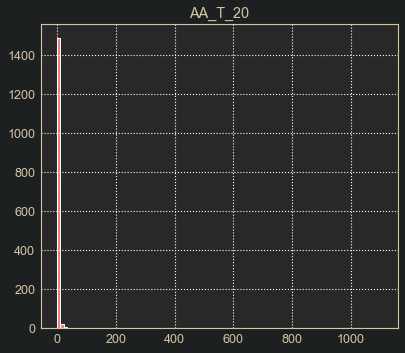

In [102]:
plot_tips = reacendimentos_slim.hist(column='AA_Total (pov+mato+agric) (ha)', bins = 100, edgecolor='white', color = 'lightcoral', 
                          linewidth=1)
# Customize grid
matplotlib.pyplot.grid(color='white', linestyle=':')
matplotlib.pyplot.title('AA_T_20')
# matplotlib.axes.Axes.set_xticks(np.arange(0, 11, 0.5))

Text(0.5, 1.0, 'AA_T_data log x+1')

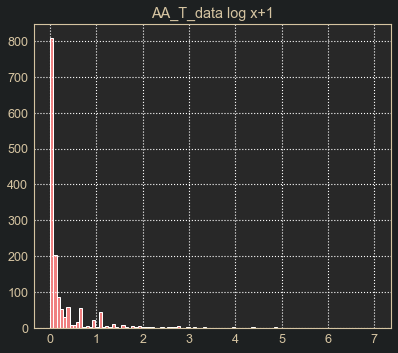

In [116]:
# Adjusting data for log
log_reacendimentos_slim = reacendimentos_slim
log_reacendimentos_slim['log_AA'] = np.log1p(reacendimentos_slim['AA_Total (pov+mato+agric) (ha)'])
log_reacendimentos_slim['log_AA'].hist(bins = 100, edgecolor='white', color = 'lightcoral', 
                          linewidth=1)

matplotlib.pyplot.grid(color='white', linestyle=':')
matplotlib.pyplot.title('AA_T_data log x+1')
# matplotlib.axes.Axes.set_xticks(np.arange(0, 11, 0.5))

# matplotlib.pyplot.yscale('log')

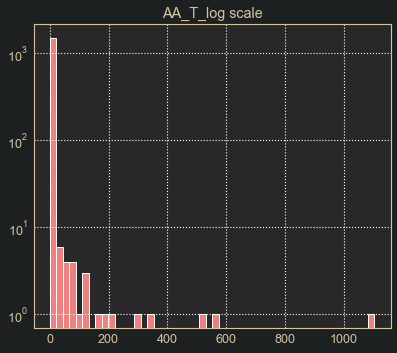

In [63]:
#Adjusting scale to log 

reacendimentos_slim['AA_Total (pov+mato+agric) (ha)'].hist(bins = 50, edgecolor='white', color = 'lightcoral', 
                          linewidth=1)
matplotlib.pyplot.grid(color='white', linestyle=':')
matplotlib.pyplot.title('AA_T_log scale')
# matplotlib.axes.Axes.set_xticks(np.arange(0, 11, 0.5))

matplotlib.pyplot.yscale('log')


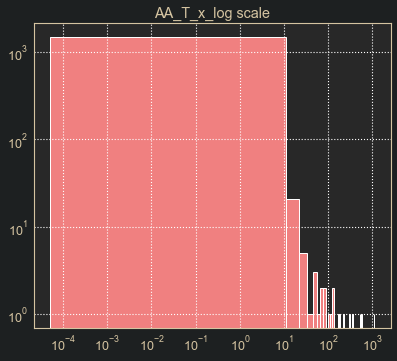

In [83]:
#Adjusting scale to log 

reacendimentos_slim['AA_Total (pov+mato+agric) (ha)'].hist(bins = 100, edgecolor='white', color = 'lightcoral', 
                          linewidth=1, log=True)
matplotlib.pyplot.grid(color='white', linestyle=':')
matplotlib.pyplot.title('AA_T_x_log scale')
# matplotlib.axes.Axes.set_xticks(np.arange(0, 11, 0.5))

matplotlib.pyplot.xscale('log', base=10)

Text(0.5, 1.0, 'AA_T_0 to 1 ha')

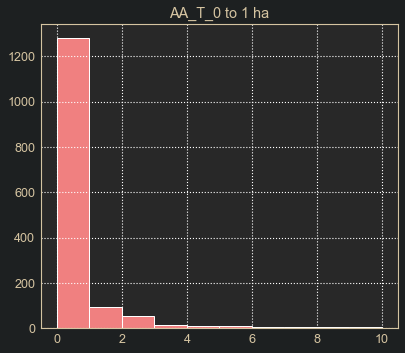

In [92]:
reacendimentos_slim['AA_Total (pov+mato+agric) (ha)'].hist(bins = 10, range=[0,10], edgecolor='white', color = 'lightcoral', 
                          linewidth=1)
matplotlib.pyplot.grid(color='white', linestyle=':')
matplotlib.pyplot.title('AA_T_0 to 1 ha')
# matplotlib.axes.Axes.set_xticks(np.arange(0, 11, 0.5))

# matplotlib.pyplot.xscale('log', base=10)

Text(0.5, 1.0, 'AA_T_0 to 1 ha')

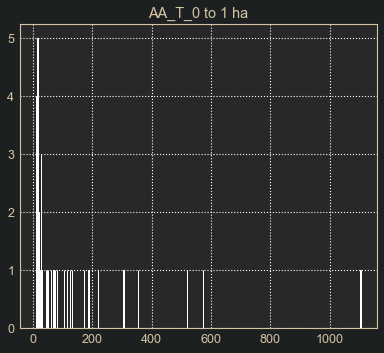

In [97]:
reacendimentos_slim['AA_Total (pov+mato+agric) (ha)'].hist(bins = 1000, range=[10,1105], edgecolor='white', color = 'lightcoral', 
                          linewidth=1)
matplotlib.pyplot.grid(color='white', linestyle=':')
matplotlib.pyplot.title('AA_T_0 to 1 ha')

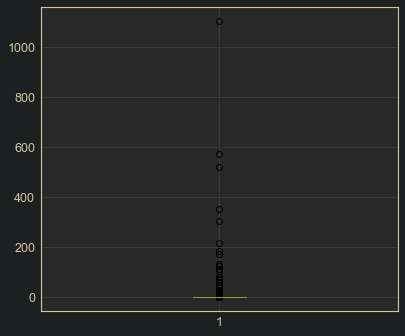

In [101]:
fig, ax = matplotlib.pyplot.subplots()
ax.boxplot(reacendimentos_slim['AA_Total (pov+mato+agric) (ha)'])
matplotlib.pyplot.show()

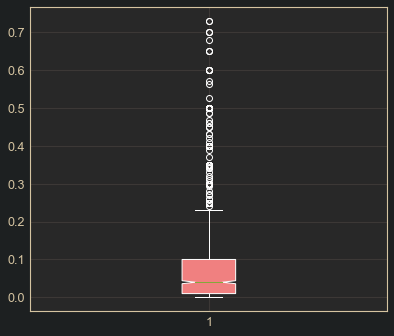

In [145]:
# Filtering data for AA_total < max upper whisker

reacendimentos_slim_wpo = reacendimentos_slim.rename(columns = {'AA_Total (pov+mato+agric) (ha)': 'AA_total_ha'})
reacendimentos_slim_wpo = reacendimentos_slim_wpo[reacendimentos_slim_wpo['AA_total_ha'] < (stat_summary.loc['75%']+1.5*stat_summary.loc['IQR'])[0]]

fig, ax = matplotlib.pyplot.subplots()
ax.boxplot(reacendimentos_slim_wpo['AA_total_ha'], patch_artist=True ,notch = True, flierprops=dict(color='white', markeredgecolor='white'), 
           whiskerprops=dict(color='white'), boxprops=dict(color='white', facecolor='lightcoral'), capprops=dict(color='white'))
matplotlib.pyplot.show()

# print((stat_summary.loc['75%']+1.5*stat_summary.loc['IQR'])[0])
